In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

### Keras를 이용한 CNN 구현 - MNIST

In [3]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  # warning 출력 방지

from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, y_train0.shape, X_test0.shape, y_test0.shape)
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, Adadelta
from keras.regularizers import l2  # weight가 너무 커지지 않도록 일반화

In [7]:
model1 = Sequential() # 모형 클래스 객체 생성

# conv layer #1 and pooling # 1
model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation=tf.nn.relu, padding="SAME"))
# conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding="SAME", activation=tf.nn.relu)(X_img)와 동일
model1.add(MaxPool2D(pool_size=[2, 2], padding='SAME', strides=2))
# pool1 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], padding="SAME", strides=2)(conv1)
model1.add(Dropout(rate=0.3))
# dropout1 = tf.keras.layers.Dropout(rate=0.3)(pool1)

# conv layer #2 and pooling #2
model1.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(14, 14, 32), activation=tf.nn.relu, padding="SAME"))
model1.add(MaxPool2D(pool_size=[2, 2], padding="SAME", strides=2))
model1.add(Dropout(rate=0.3))

# conv layer #3 and pooling #3
model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(7, 7, 64), activation=tf.nn.relu, padding="SAME"))
model1.add(MaxPool2D(pool_size=[2, 2], padding="SAME", strides=2))
model1.add(Dropout(rate=0.3))

# Dense Layer with Relu (input img 4, 4, 1, 128)
model1.add(Flatten())
# flat = tf.reshape(dropout3, [-1, 4 * 4 * 128])
model1.add(Dense(units=625, activation=tf.nn.relu))
# dense4 = tf.keras.layers.Dense(units=625, activation=tf.nn.relu)(flat)
model1.add(Dropout(rate=0.5))        
# dropout4 = tf.keras.layers.Dropout(rate=0.5)(dense4)

# hypothesis
model1.add(Dense(units=10, activation=tf.nn.softmax, kernel_initializer="glorot_uniform"))

In [9]:
np.random.seed(0)
model1.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=Adam())

In [10]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

### Train the model

In [12]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=15, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 144s - loss: 0.2719 - acc: 0.9098 - val_loss: 0.0488 - val_acc: 0.9842
Epoch 2/15
 - 140s - loss: 0.0851 - acc: 0.9730 - val_loss: 0.0310 - val_acc: 0.9894
Epoch 3/15
 - 140s - loss: 0.0642 - acc: 0.9799 - val_loss: 0.0269 - val_acc: 0.9911
Epoch 4/15
 - 141s - loss: 0.0556 - acc: 0.9825 - val_loss: 0.0249 - val_acc: 0.9916
Epoch 5/15
 - 142s - loss: 0.0500 - acc: 0.9841 - val_loss: 0.0258 - val_acc: 0.9919
Epoch 6/15
 - 141s - loss: 0.0434 - acc: 0.9861 - val_loss: 0.0187 - val_acc: 0.9934
Epoch 7/15
 - 141s - loss: 0.0401 - acc: 0.9874 - val_loss: 0.0212 - val_acc: 0.9932
Epoch 8/15
 - 141s - loss: 0.0385 - acc: 0.9880 - val_loss: 0.0191 - val_acc: 0.9938
Epoch 9/15
 - 139s - loss: 0.0362 - acc: 0.9884 - val_loss: 0.0211 - val_acc: 0.9932
Epoch 10/15
 - 134s - loss: 0.0327 - acc: 0.9893 - val_loss: 0.0188 - val_acc: 0.9944
Epoch 11/15
 - 153s - loss: 0.0312 - acc: 0.9901 - val_loss: 0.0184 - val_acc: 0.9942
Epoch 12/15
 

In [13]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)
fm._rebuild()

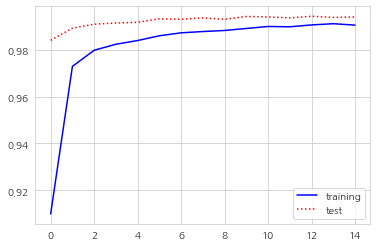

In [14]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

In [17]:
l1 = model1.layers[0]
w1, b1 = l1.get_weights() # filters of layer 1
w1.shape, b1.shape

((3, 3, 1, 32), (32,))

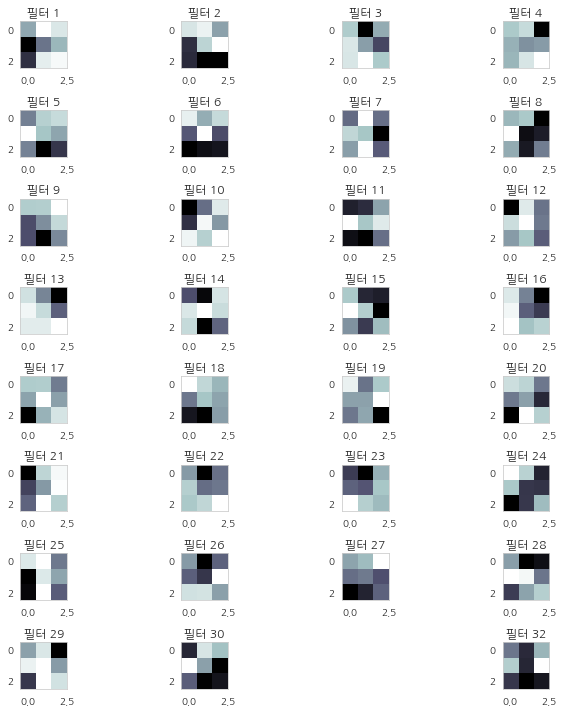

In [21]:
M = 32
plt.figure(figsize=(10, 10))
for i in range(M):
    plt.subplot(8, 4, i + 1)
    plt.imshow(w1[:, :, 0, i], cmap=mpl.cm.bone)
    plt.title("필터 {}".format(i+1))
    plt.tight_layout()
    plt.grid(False)